# Learning Survival models

Notebook with some notes and code exercises for survival models

# Notes

## Survival Distribution:

$$F(t) = \mathbb{P}[T<t] = \int_{0}^{t} f(x)dx | T,t \in \mathbb{R}^+$$

## Survival function:

$$S(t) = \mathbb{P}[T \geq t] = 1 - F(t) = \int_{t}^{\infty}f(x)dx$$

## Hazzard function:

Similar like a _risk_ function, this is not a probability, because the result can be > 1

$$h(t) = \lim_{dt \to \infty} \frac{\mathbb{P}[t \leq T < t+dt|T\geq t]}{dt} = \lim_{dt \to \infty} \frac{[\frac{S(t) - S(t + dt)}{dt}]}{S(t)} = \int_{t}^{t+dt} \frac{f(x)dx}{S(t)} = \frac{f(t)}{S(t)}$$

The numerator of this expression is the conditional probability that the event
will occur in the interval _[t, t+dt)_ given that it has not occurred before, and
the denominator is the width of the interval. Dividing one by the other we
obtain a rate of event occurrence per unit of time. Taking the limit as the
width of the interval goes down to zero, we obtain an instantaneous rate of
occurrence.

We can see that $\frac{d}{dt}S(t) = \frac{d}{dt}1 - F(t) = -f(t)$.

Also, we know that $\frac{dlog(x)}{dx} = \frac{x'}{x}$, so we can write the hazzard function as:

$$h(t) = -\frac{d}{dt}logS(t)$$

So, if we can write the hazzard in terms of the survival function, we can also write the survival function in terms of the hazzard function; this by making the integrate from 0 to t in both sides of the ecuation.

$$\int_{0}^{t} h(x)dx = -logS(t)$$

$$S(t) = exp(-\int_{0}^{t} h(x)dx)$$

## Kaplan-Meir Estimator

Estimate the Survival curve by intervals, i.e., convert to a discrete function the sample, to create an estimation for each interval.

$$\widehat{S} = \prod_{i \in t_i < t} \frac{n_i - d_i}{n_i}$$

$i = \text{interval "i" as } [t_i,t_i+dt]$

$n_i = \text{Number of survivals in }t \subseteq [t_i,t_i+dt]$

$d_i = \text{Number of survivals in }t \in [t_i,t_i+dt]$

### Another estimation

An easier way to estimate the survival time for a time *t* , is with the ratio of people surviving beyond _t_, between the total of people.

$$\widehat{S} = \frac{\sum_{i}^{n} \mathbb{I}_i}{n}$$

_i is the number of people in the sample_

## Cox Estimation

As we saw, the Kaplan-Meir Estimator is for a sample, but what happend if we want to estimate the time of survival of an individual in function of some features?, we need to estimate a model, that's about the Cox estimation.

$$H(t|x) = h_0(t)*exp(X^T*\beta) = exp(X^T*\beta)\int_{0}^{t}f(s)ds = exp(X^T*\beta)H_0(t)$$

# Exercise

## Library

In [22]:
from sksurv.datasets import load_veterans_lung_cancer
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.preprocessing import OneHotEncoder
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored

## Load Data

In [3]:
data_x, data_y = load_veterans_lung_cancer()

In [6]:
data_y

array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

Example to estimate the survival curve:

In [7]:
pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6))

Status  Survival_in_days
1    True               8.0
2    True              10.0
3    True              20.0
4   False              25.0
5    True              59.0

Suppose t = 11: We have 3 patients that survived at least 11 days.

$$S(11) = \frac{3}{5}$$

If we suppose t = 30, we don't have information to confirm if at least 1 patient survived 30 days.

_(Patient 4 is alive at day 25, we don't know if he survive at day 30)_

## Kaplan-Meir Estimation

Text(0.5, 0, 'time $t$')

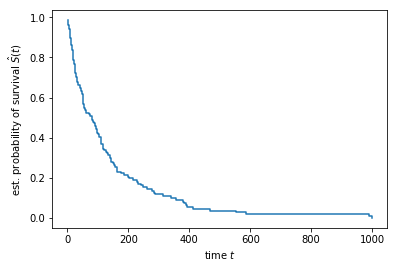

In [9]:
time, survival_prob = kaplan_meier_estimator(data_y["Status"], data_y["Survival_in_days"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

## Kaplan-Meir conditional estimator

### Traetment

Estimate the survival curve, conditional if the patient had or not a treatement

In [10]:
data_x["Treatment"].value_counts()

standard    69
test        68
Name: Treatment, dtype: int64

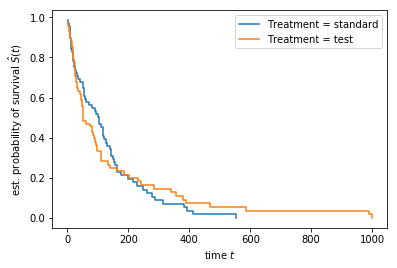

In [11]:
for treatment_type in ("standard", "test"):
    mask_treat = data_x["Treatment"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y["Status"][mask_treat],
        data_y["Survival_in_days"][mask_treat])
    
    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Treatment = %s" % treatment_type)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

Not conclusive, the differences are not significative

### Celltype

Let's try to find differences in the survival curves, for each celltype

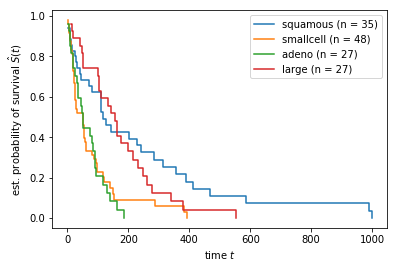

In [12]:
for value in data_x["Celltype"].unique():
    mask = data_x["Celltype"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(data_y["Status"][mask],
                                                           data_y["Survival_in_days"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()))

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

_Squamous_ and _large_ celltypes are the best for survival

# Cox Estimation - Multivariate Survival Models

This is to _fit_ a model to predict the survival time for each observation.

## Data

One hote encoding for actegorical features

In [14]:
data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

Age_in_years  Celltype=large  Celltype=smallcell  Celltype=squamous  \
0          69.0             0.0                 0.0                1.0   
1          64.0             0.0                 0.0                1.0   
2          38.0             0.0                 0.0                1.0   
3          63.0             0.0                 0.0                1.0   
4          65.0             0.0                 0.0                1.0   

   Karnofsky_score  Months_from_Diagnosis  Prior_therapy=yes  Treatment=test  
0             60.0                    7.0                0.0             0.0  
1             70.0                    5.0                1.0             0.0  
2             60.0                    3.0                0.0             0.0  
3             60.0                    9.0                1.0             0.0  
4             70.0                   11.0                1.0             0.0

## Fit

In [16]:
estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)

CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0)

## Coefficients

In [17]:
pd.Series(estimator.coef_, index=data_x_numeric.columns)

Age_in_years            -0.008549
Celltype=large          -0.788672
Celltype=smallcell      -0.331813
Celltype=squamous       -1.188299
Karnofsky_score         -0.032622
Months_from_Diagnosis   -0.000092
Prior_therapy=yes        0.072327
Treatment=test           0.289936
dtype: float64

## Test with a new sample data

Lets create new data to make a predict, and analize the survival time predictions

In [18]:
x_new = pd.DataFrame.from_dict({
    1: [65, 0, 0, 1, 60, 1, 0, 1],
    2: [65, 0, 0, 1, 60, 1, 0, 0],
    3: [65, 0, 1, 0, 60, 1, 0, 0],
    4: [65, 0, 1, 0, 60, 1, 0, 1]},
     columns=data_x_numeric.columns, orient='index')
x_new

Age_in_years  Celltype=large  Celltype=smallcell  Celltype=squamous  \
1            65               0                   0                  1   
2            65               0                   0                  1   
3            65               0                   1                  0   
4            65               0                   1                  0   

   Karnofsky_score  Months_from_Diagnosis  Prior_therapy=yes  Treatment=test  
1               60                      1                  0               1  
2               60                      1                  0               0  
3               60                      1                  0               0  
4               60                      1                  0               1

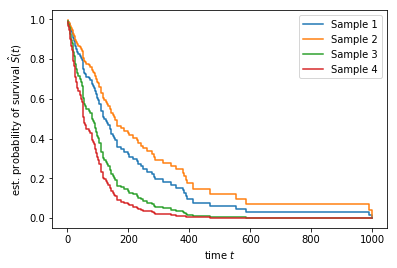

In [19]:
pred_surv = estimator.predict_survival_function(x_new)
for i, c in enumerate(pred_surv):
    plt.step(c.x, c.y, where="post", label="Sample %d" % (i + 1))
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

# Measuring the Performance of Survival Models

Usually is used the Harrell's concordance index, and the interpretation is the same as the ROC curve.

In [23]:
prediction = estimator.predict(data_x_numeric)
result = concordance_index_censored(data_y["Status"], data_y["Survival_in_days"], prediction)
result[0]

0.7362562471603816

In [ ]:
151427294